<a href="https://colab.research.google.com/github/nascript/python-journey/blob/datascience-dasar/DATA_SCIENCE_DASAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA (EXPLORATORY DATA ANALYST)



## 1. import library

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
%matplotlib inline
sns.set(color_codes=True)

## 2. Load Data into the frame (table)

data di load menggunakan library pandas agar ditampilkan dalam bentuk table atau istilahnya pada pandas table = frame

In [3]:
df = pd.read_csv("data_car.csv")
# to display the top 5 rows data
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


## 3. Check tipe data yang ada pada table atau data

In [5]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

## 4. Menghilangkan kolom (features) yang tidak relevant
artinya menghilangkan beberapa fitur yang tidak relevant dengan tujuan model

In [6]:
# Drop specified columns / features
columns_to_drop = ['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size']
df = df.drop(columns=columns_to_drop)

# Display the DataFrame after dropping columns
print(df.head(5))


  Make       Model  Year  Engine HP  Engine Cylinders Transmission Type  \
0  BMW  1 Series M  2011      335.0               6.0            MANUAL   
1  BMW    1 Series  2011      300.0               6.0            MANUAL   
2  BMW    1 Series  2011      300.0               6.0            MANUAL   
3  BMW    1 Series  2011      230.0               6.0            MANUAL   
4  BMW    1 Series  2011      230.0               6.0            MANUAL   

      Driven_Wheels  highway MPG  city mpg   MSRP  
0  rear wheel drive           26        19  46135  
1  rear wheel drive           28        19  40650  
2  rear wheel drive           28        20  36350  
3  rear wheel drive           28        18  29450  
4  rear wheel drive           28        18  34500  


## 5. Renaming Kolom (features)
ini hanya opsional sesuai kebutuhan agar bisa readable for human

In [7]:
df = df.rename(columns={"Engine HP" : "HP", "Driven_Wheels" : "Drive Mode", "MSRP" : "Price"})
df.head(5)

,Make,Model,Year,HP,Engine Cylinders,Transmission Type,Drive Mode,highway MPG,city mpg,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## 6. Menghilangkan kolom yang terdupolikat (duplicate)

In [8]:
df.shape #untuk mengetahui BARIS dan KOLOM ke semua data

(11914, 10)

In [9]:
duplicate_rows_df = df[df.duplicated()] # untuk mengetahui baris data duplicate
print("number of duplicate rows: ", duplicate_rows_df.shape) #untuk menampilkan baris data yang duplicate data

number of duplicate rows:  (989, 10)


In [10]:
df.count() #untuk menghitung banyak baris sama kayak df.shape

Make                 11914
Model                11914
Year                 11914
HP                   11845
Engine Cylinders     11884
Transmission Type    11914
Drive Mode           11914
highway MPG          11914
city mpg             11914
Price                11914
dtype: int64

In [11]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Engine Cylinders,Transmission Type,Drive Mode,highway MPG,city mpg,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [12]:
df.count() # data yang telah dihapus duplicatenya

Make                 10925
Model                10925
Year                 10925
HP                   10856
Engine Cylinders     10895
Transmission Type    10925
Drive Mode           10925
highway MPG          10925
city mpg             10925
Price                10925
dtype: int64

## 7. Hapus data yang valuenya tidak ada atau 0 / null\

kalau datanya banyak valuenya dibuat 0 saja tapi kalau datanya kurang diisi saja berdasarkan value rata-rata (mean) dari feature lain

In [13]:
print(df.isnull().sum()) # print data yang null atau missing, hasilnya ada 2 feature atau kolom yang memiliki missing value yaitu HP dan Engine Cylinders

Make                  0
Model                 0
Year                  0
HP                   69
Engine Cylinders     30
Transmission Type     0
Drive Mode            0
highway MPG           0
city mpg              0
Price                 0
dtype: int64


In [14]:
df = df.dropna() # hapus kolom NA atau data yang non available / missing sebelumnya yaitu hp dan engine cylinders
df.count()

Make                 10827
Model                10827
Year                 10827
HP                   10827
Engine Cylinders     10827
Transmission Type    10827
Drive Mode           10827
highway MPG          10827
city mpg             10827
Price                10827
dtype: int64

In [15]:
print(df.isnull().sum())

Make                 0
Model                0
Year                 0
HP                   0
Engine Cylinders     0
Transmission Type    0
Drive Mode           0
highway MPG          0
city mpg             0
Price                0
dtype: int64


## 8. Deteksi Nilai Outlier
nilai outliers adalah suatu nilai yang tidak biasa dari kebanyakan atau rata2 dari kumpulan data. misal ada 100 data tapi 99 data orang miskin sedangkan 1 orang kaya, nah 1 orang kaya ini disebut nilai outliers.

kenapa harus deteksi? karena tidak umum karena akan mengacaukan proses pembelajaran machine learning.



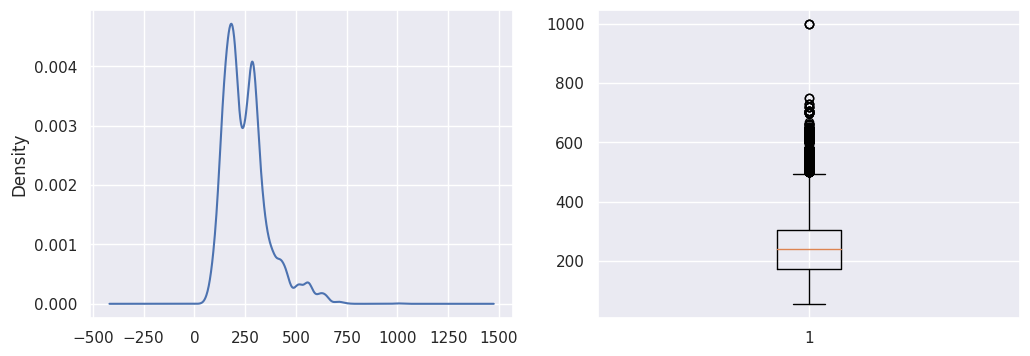

In [16]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['HP'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['HP'])
plt.show()

<Axes: xlabel='HP'>

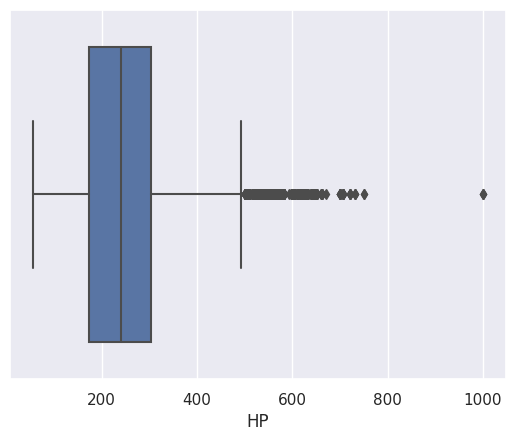

In [17]:
sns.boxplot(x=df['HP'])

setelah mengetahui data memiliki nilai outliers maka ada dua cara pendekatan setelah nya yaitu normalisasi data dan deskritisasi

## 9. Histogram

untuk analisys univariat feature atau kolom

In [18]:
df.Price.describe() # memunculkan nilai statistik dari kolom price

count    1.082700e+04
mean     4.249325e+04
std      6.229451e+04
min      2.000000e+03
25%      2.197250e+04
50%      3.084500e+04
75%      4.330000e+04
max      2.065902e+06
Name: Price, dtype: float64

Text(0.5, 0, 'Make')

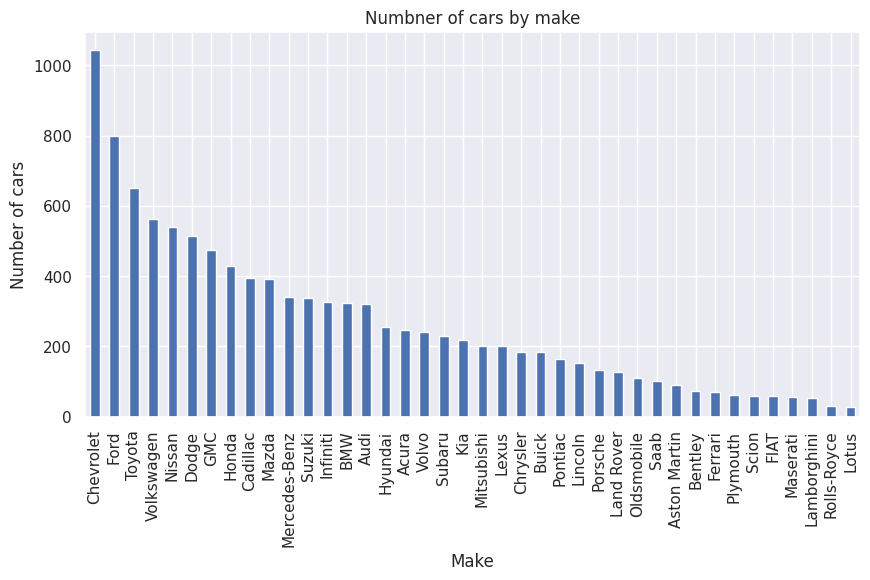

In [23]:
df.Make.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title("Numbner of cars by make")
plt.ylabel("Number of cars")
plt.xlabel('Make')

## 10. Heat Maps
untuk analisys bivariant atau dua atribute / kolom/ feature

<ipython-input-27-047f4afe764f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df.corr()


,Year,HP,Engine Cylinders,highway MPG,city mpg,Price
Year,1.000000,0.314971,-0.050598,0.284237,0.234135,0.196789
HP,0.314971,1.000000,0.788007,-0.420281,-0.473551,0.659835
Engine Cylinders,-0.050598,0.788007,1.000000,-0.611576,-0.632407,0.554740
highway MPG,0.284237,-0.420281,-0.611576,1.000000,0.841229,-0.209150
city mpg,0.234135,-0.473551,-0.632407,0.841229,1.000000,-0.234050
Price,0.196789,0.659835,0.554740,-0.209150,-0.234050,1.000000


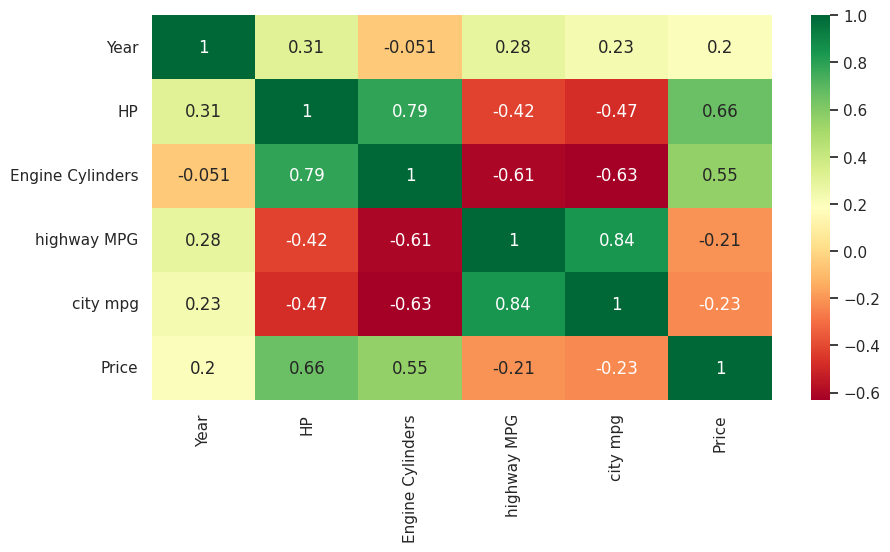

In [27]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="RdYlGn", annot=True)
c

untuk analisys multivariet atau lebih dua atribute / kolom/ feature

Drive Mode         all wheel drive  four wheel drive  front wheel drive  \
Transmission Type                                                         
AUTOMATED_MANUAL     157828.994949               NaN       30761.103896   
AUTOMATIC             48403.715344      43019.606742       26441.647017   
DIRECT_DRIVE                   NaN               NaN       30318.181818   
MANUAL                60817.829016      12554.718412       15394.341637   
UNKNOWN                        NaN       2447.500000        2000.000000   

Drive Mode         rear wheel drive  
Transmission Type                    
AUTOMATED_MANUAL      175529.387097  
AUTOMATIC              56987.558117  
DIRECT_DRIVE           42700.000000  
MANUAL                 44945.319690  
UNKNOWN                 5146.500000  


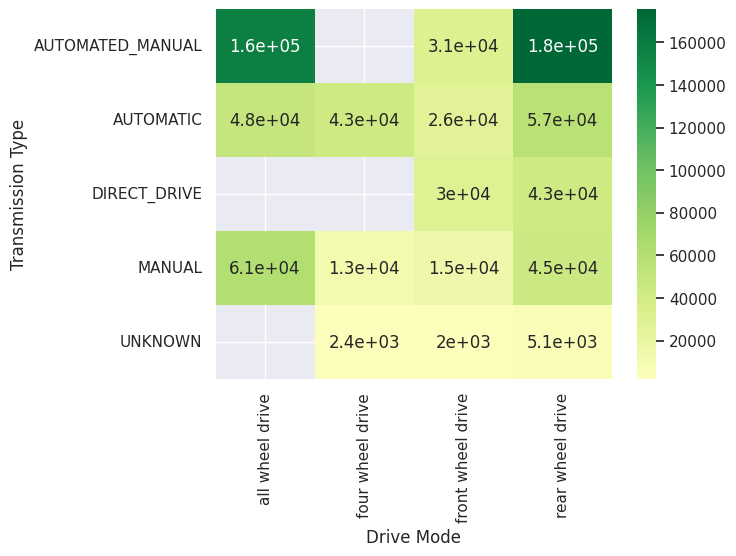

In [34]:
result = pd.pivot_table(data=df, index='Transmission Type', columns="Drive Mode", values="Price")
print(result)

sns.heatmap(result, annot=True, cmap="RdYlGn", center=0.117 )
plt.show()

### Scatterplot
grafik untuk menalisis keterkaitan (korelasi) antara kedua atribute atau feature

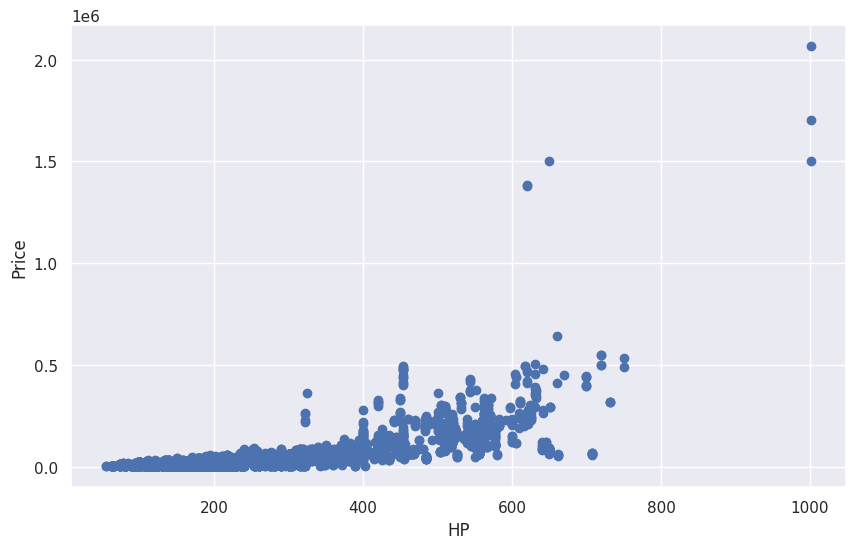

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df["Price"])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

## 11. Correlation Matriks


In [37]:
df[['HP', 'Price']].corr()

,HP,Price
HP,1.000000,0.659835
Price,0.659835,1.000000


## 12. NORMALISASi
untuk membuat skala data agak sama karena rentang data skala yang terlalu jauh berbeda yang nanti akan menmyulitkan ML belajar.

In [56]:
data = pd.read_csv('datasetgaji2.csv')
print(data)

             Nama Status Rumah  Gaji Orang Tua  Umur
0      aldi taher      Kontrak         2100000    24
1          kekeyi        Milik         4000000    23
2   rangga sasana      Kontrak         1400000    21
3  vicky prasetyo      Kontrak          700000    28
4            Zuko        Milik          650000    27
5           dyrga      Kontrak          450000    22


In [57]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data[['Gaji Orang Tua', 'Umur']])
print(scaled)

[[0.46478873 0.42857143]
 [1.         0.28571429]
 [0.26760563 0.        ]
 [0.07042254 1.        ]
 [0.05633803 0.85714286]
 [0.         0.14285714]]


## 13. Data Standarization


In [58]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data[['Gaji Orang Tua', 'Umur']])
print(scaled)

[[ 0.44733685 -0.06551218]
 [ 1.99268231 -0.45858525]
 [-0.12200096 -1.24473139]
 [-0.69133876  1.5067801 ]
 [-0.73200575  1.11370703]
 [-0.89467369 -0.85165832]]


## 14. Diskritization / Binning
untuk melakukan kategorisasi data numerik ke kategori

In [59]:
batas_bin = [0, 1400000, 4000000]
kategori = ['Kecil', 'Besar']

data['gaji_binned_1'] = pd.cut(data['Gaji Orang Tua'], bins=batas_bin, labels=kategori) #kolom baru hasil kategorisasi
print(data)

             Nama Status Rumah  Gaji Orang Tua  Umur gaji_binned_1
0      aldi taher      Kontrak         2100000    24         Besar
1          kekeyi        Milik         4000000    23         Besar
2   rangga sasana      Kontrak         1400000    21         Kecil
3  vicky prasetyo      Kontrak          700000    28         Kecil
4            Zuko        Milik          650000    27         Kecil
5           dyrga      Kontrak          450000    22         Kecil


## 15. Binning dengan linspace
mengelompokan data menjadi beberapa kelompok yang memiliki jarak yang sama

In [60]:
bins = np.linspace(min(data['Gaji Orang Tua']), max(data['Gaji Orang Tua']), 3) # 3 artinya jumlah elemen kategori yang akan dibuat, misal ada 2 kelompok maka jumlah data dibagi 3 jadi 2 kelompok
print(bins)

[ 450000. 2225000. 4000000.]


hasil ini [ 450000. 2225000. 4000000.] antara 4500000 ke 22250000 jarak nya sama dengan 2225000 ke 400000 itulah linspace

In [61]:
data['gaji_binned2'] = pd.cut(data['Gaji Orang Tua'], bins=bins, labels=kategori, include_lowest=True)
print(data)

             Nama Status Rumah  Gaji Orang Tua  Umur gaji_binned_1  \
0      aldi taher      Kontrak         2100000    24         Besar   
1          kekeyi        Milik         4000000    23         Besar   
2   rangga sasana      Kontrak         1400000    21         Kecil   
3  vicky prasetyo      Kontrak          700000    28         Kecil   
4            Zuko        Milik          650000    27         Kecil   
5           dyrga      Kontrak          450000    22         Kecil   

  gaji_binned2  
0        Kecil  
1        Besar  
2        Kecil  
3        Kecil  
4        Kecil  
5        Kecil  


## 16 Binning dengan quantile
kategorisasi berdasarkan rentang (range) atau presentasenya

misal presentrase 25%, 75% dll

In [62]:
data['gaji_binned3'] = pd.qcut(data['Gaji Orang Tua'], 2)
print(data)

             Nama Status Rumah  Gaji Orang Tua  Umur gaji_binned_1  \
0      aldi taher      Kontrak         2100000    24         Besar   
1          kekeyi        Milik         4000000    23         Besar   
2   rangga sasana      Kontrak         1400000    21         Kecil   
3  vicky prasetyo      Kontrak          700000    28         Kecil   
4            Zuko        Milik          650000    27         Kecil   
5           dyrga      Kontrak          450000    22         Kecil   

  gaji_binned2             gaji_binned3  
0        Kecil   (1050000.0, 4000000.0]  
1        Besar   (1050000.0, 4000000.0]  
2        Kecil   (1050000.0, 4000000.0]  
3        Kecil  (449999.999, 1050000.0]  
4        Kecil  (449999.999, 1050000.0]  
5        Kecil  (449999.999, 1050000.0]  


In [64]:
# mengelmpokan hasil range agar readable
data['gaji_binned3'] = pd.qcut(data['Gaji Orang Tua'], q=2, labels=kategori) # q = quantile artinya dikelompokan menjadi 2
print(data)

             Nama Status Rumah  Gaji Orang Tua  Umur gaji_binned_1  \
0      aldi taher      Kontrak         2100000    24         Besar   
1          kekeyi        Milik         4000000    23         Besar   
2   rangga sasana      Kontrak         1400000    21         Kecil   
3  vicky prasetyo      Kontrak          700000    28         Kecil   
4            Zuko        Milik          650000    27         Kecil   
5           dyrga      Kontrak          450000    22         Kecil   

  gaji_binned2 gaji_binned3  
0        Kecil        Besar  
1        Besar        Besar  
2        Kecil        Besar  
3        Kecil        Kecil  
4        Kecil        Kecil  
5        Kecil        Kecil  


## 17. One Hot encoding
untuk mengkategorikan data numerik menjadi kategory